Name : Major Project

College : Delhi Technological University

# German traffic sign recognition benchmark

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [ ]:
!pip install pathlib

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import keras
np.random.seed(42)

Data preparation

In [ ]:
#to get name of each class creating dictionary
lab_to_name = {
                0:'Speed limit (20km/h)',
                1:'Speed limit (30km/h)',
                2:'Speed limit (50km/h)',
                3:'Speed limit (60km/h)',
                4:'Speed limit (70km/h)',
                5:'Speed limit (80km/h)',
                6:'End of speed limit (80km/h)',
                7:'Speed limit (100km/h)',
                8:'Speed limit (120km/h)',
                9:'No passing',
                10:'No passing veh over 3.5 tons',
                11:'Right-of-way at intersection',
                12:'Priority road',
                13:'Yield',
                14:'Stop',
                15:'No vehicles',
                16:'Veh > 3.5 tons prohibited',
                17:'No entry',
                18:'General caution',
                19:'Dangerous curve left',
                20:'Dangerous curve right',
                21:'Double curve',
                22:'Bumpy road',
                23:'Slippery road',
                24:'Road narrows on the right',
                25:'Road work',
                26:'Traffic signals',
                27:'Pedestrians',
                28:'Children crossing',
                29:'Bicycles crossing',
                30:'Beware of ice/snow',
                31:'Wild animals crossing',
                32:'End speed + passing limits',
                33:'Turn right ahead',
                34:'Turn left ahead',
                35:'Ahead only',
                36:'Go straight or right',
                37:'Go straight or left',
                38:'Keep right',
                39:'Keep left',
                40:'Roundabout mandatory',
                41:'End of no passing',
                42:'End no passing veh > 3.5 tons'
              }

In [ ]:
######how to get lable from the directory
###Converting those strings as the labels
### Train\0  -->>    str(d).split("\\")[-1] ---> this gives the last word(number)  thats the label

In [ ]:
p = Path('./Train');
dirs = p.glob("*");
dirs

<generator object Path.glob at 0x784279a1bdf0>

In [ ]:
lable = []   ##lable array
img_data = [] ##input training images as array format
count = {}   ##using the dict to count no.of images of each type


for folder in dirs:
    lables = str(folder).split("\\")[-1];

    #getting every image path from that folder
    cnt = 0;
    for img_path in folder.glob("*"):

        ##using keras reading the imager
        img = image.load_img(img_path,target_size=(40,40));

        ##converting img to array
        image_data = image.img_to_array(img);

        ##append into image_data array
        img_data.append(image_data);
        cnt+=1;   ##counting no.of images in each sub folder

        ##append the ouput label in lables array
        lable.append(lables);
        #lable1 = lable2name[lable]
    count[lab_to_name[int(lables)]] = cnt;

print(count);

{}


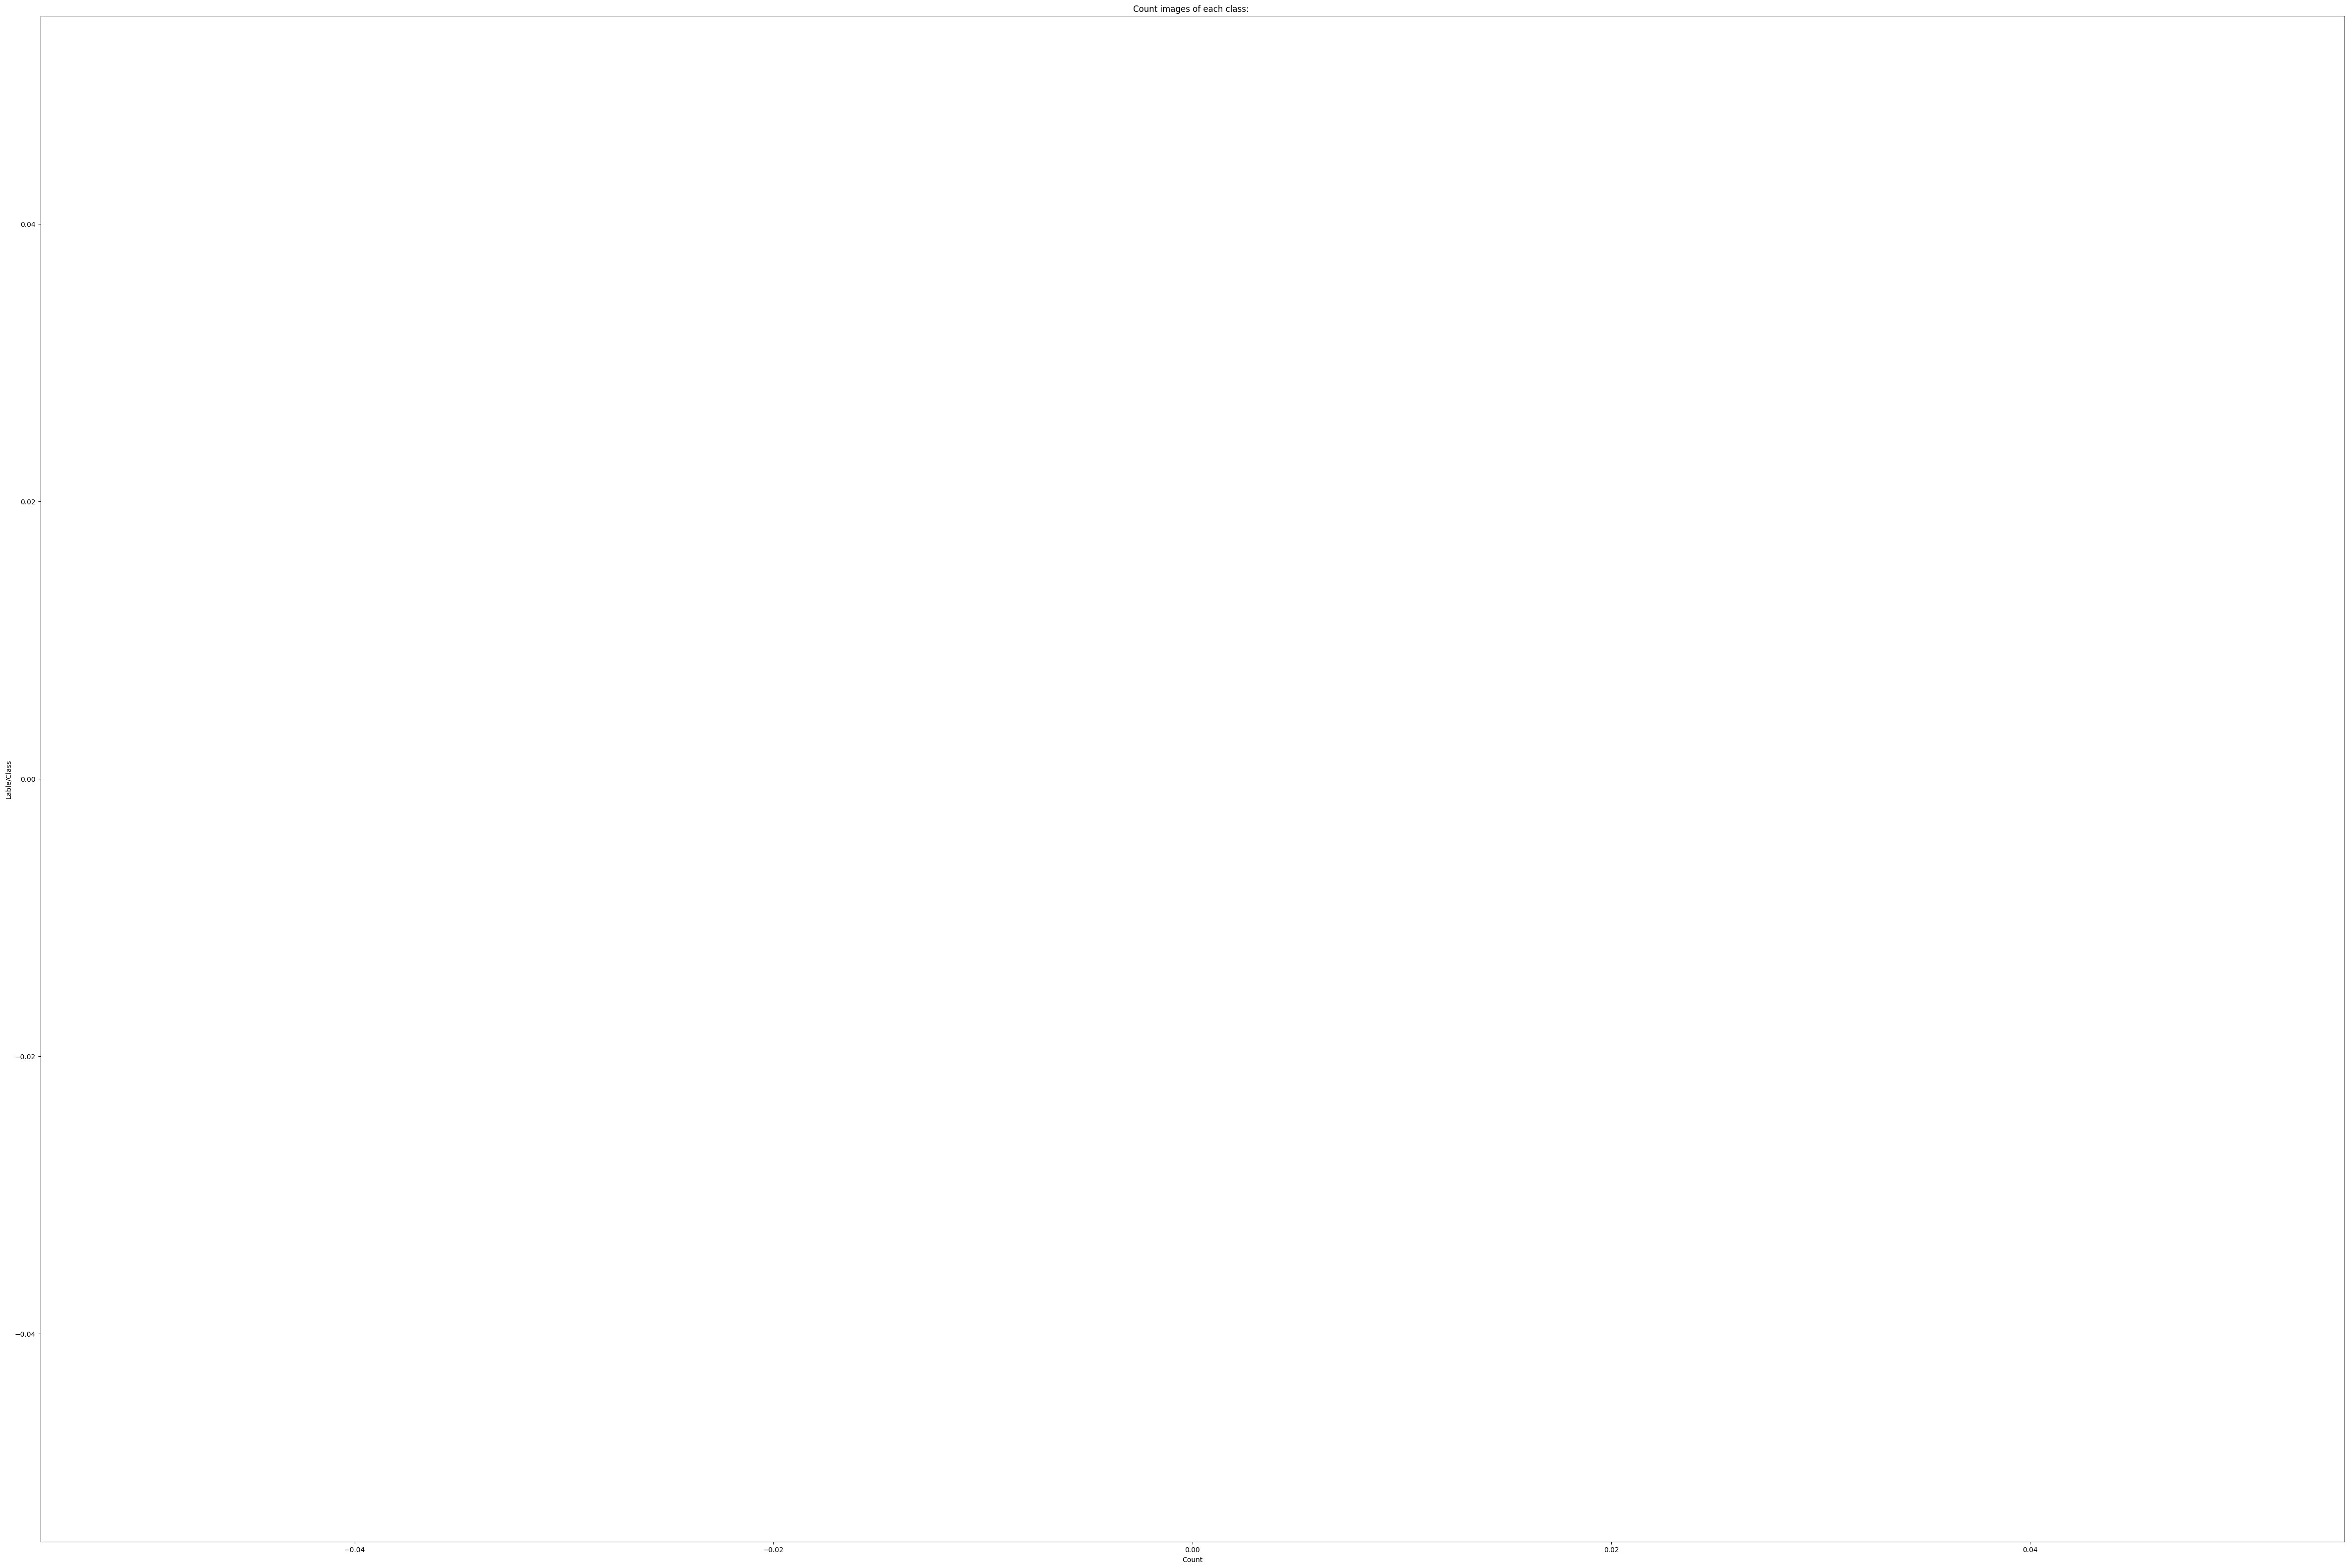

In [ ]:
#####Plotting the bar graph of counts of images
plt.figure(figsize = (60, 40))
plt.barh(list(count.keys()),list(count.values()));
plt.title("Count images of each class: ");
plt.xlabel("Count");
plt.ylabel("Lable/Class");
for index, value in enumerate(list(count.values())):
    plt.text(value, index, str(value))

In [ ]:
x = np.array(img_data);
y = np.array(lable);

In [ ]:
x.shape

(0,)

In [ ]:
y.shape

(0,)

In [ ]:
from sklearn.utils import shuffle
x,y = shuffle(x,y,random_state=2);
plt.figure(figsize = (100, 100))
if len(x) > 0 and len(y) > 0:
    num_images = min(20, len(x))  # To handle cases where len(x) < 20
    for i in range(num_images):
        plt.subplot(4, 5, i+1)
        plt.imshow(x[i] / 255)
        plt.ylabel(lab_to_name[int(y[i])], fontsize=10)  # Adjust fontsize as needed
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("x or y is empty. Please check your data.")


x or y is empty. Please check your data.


<Figure size 10000x10000 with 0 Axes>

In [ ]:
#Normalizing the X by keeping values bwteen 0 & 1
x = x/255.0;
x.shape

In [ ]:
from keras.utils import to_categorical
y= to_categorical(y);   #changing dimension
print(y.shape);

In [ ]:
shuffle_indexes = np.arange(x.shape[0])
np.random.shuffle(shuffle_indexes)
x = x[shuffle_indexes]
y = y[shuffle_indexes]
print(x.shape);
print(y.shape);

In [ ]:
#Splitting the dataset into test and train set

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=25, shuffle=True)



print("X_train.shape", x_train.shape)
print("X_valid.shape", x_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(40,40,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),

    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
lr = 0.001    #learning rate
epochs = 10   #no.of epochs

opt = Adam(lr=lr, decay=lr / (epochs*0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest"
)

In [ ]:
hist = model.fit(aug.flow(x_train, y_train, batch_size=128), epochs=epochs, validation_data=(x_val, y_val))

In [ ]:
#Evaluating model ->
pd.DataFrame(hist.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Predictions on dataset

In [ ]:
#reading labels from dataset csv file
test = pd.read_csv("Test.csv");
print(test.head(5));

In [ ]:
test_labels = test["ClassId"].values
test_labels

In [ ]:
pt  =  Path("./Test");    #path checking for train folder
image_test_data = [];

for imgtest in pt.glob("*.png"):

    img = image.load_img(imgtest,target_size=(40,40));

    img_data = image.img_to_array(img);

    image_test_data.append(img_data);


In [ ]:
x_test = np.array(image_test_data);
y_actual = np.array(test_labels);
x_test = x_test/255;
print(x_test.shape);
print(y_actual.shape);

In [ ]:
#predicting the data with model

y_pred = np.argmax(model.predict(x_test), axis=1);

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
print('Test Data Accuracy: ',accuracy_score(y_actual, y_pred)*100)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,y_pred))

In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_actual, y_pred)
print(cf_matrix);

In [ ]:
#predction on test images
plt.figure(figsize = (50,40))

start_index = 0;
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  prediction = y_pred[start_index + i]
  actual = y_actual[start_index + i]
  col = 'g'     #if prediction is right
  if prediction != actual:
    col = 'r'   #if prediction is wrong
  plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
  plt.imshow(x_test[start_index + i])
plt.show()